# Experiment7 病毒式营销（Viral Information Diffusion）

In [1]:
import networkx as nx
import random as r
import matplotlib.pyplot as plt
import numpy as np

## 建立用户对象

+ 普通用户

In [2]:
class Person(object):
    def __init__(self, id):
        self.id=id
        self.i = r.random() # 普通用户的初始态度
        self.a = self.i # 普通用户的态度
        self.alpha=0.8 # 普通用户的态度坚定指数
        
    def __str__(self):
        return(str(self.id))
    
    # 每一步，每个用户的态度根据周围的邻居进行更新
    def step(self):
        neighbors=g[self]
        w=1/float((len(neighbors)+1))
        s=w*self.a
        for node in neighbors:
            s+=w*node.a
            # 更新信念
            self.a=(1-self.alpha)*self.i + self.alpha*s

+ 影响者

In [3]:
class Influencer(Person):
    def __init__(self,id):
        self.id=id
        self.i = r.random()
        self.a = 1 # 影响者的态度为最高1，且意见是坚定而不可动摇的
    
    def step(self):
        pass

## 创建Person对象网络

+ 初始化网络

In [4]:
density=0.3
g = nx.Graph()

+ 添加普通用户

In [5]:
users = 10
for i in range(users):
    p = Person(i)
    g.add_node(p)

+ 添加影响者

In [6]:
influencers = 2
for i in range(influencers):
    inf = Influencer("Inf"+str(i))
    g.add_node(inf)

+ 建立ER随机图

In [7]:
for x in g.nodes():
    for y in g.nodes():
        if r.random()<=density: g.add_edge(x,y)

+ 绘制网络

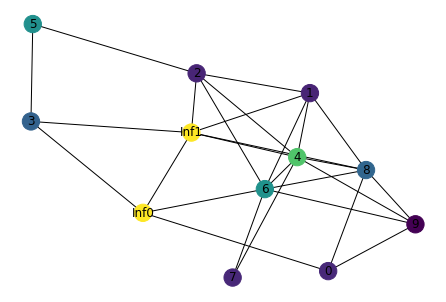

In [8]:
# 对结果图进行原始处理，并根据节点的值为节点着色
col=[n.a for n in g.nodes()]
pos=nx.spring_layout(g)
nx.draw(g, pos=pos, node_color=col, label=col, with_labels=True)

**说明**
+ 我们建立一个随机网络，密度为density=0.3
+ 该网络中有2个影响者，他们对某个产品的态度为最高且坚定为1
+ 网络中有10个普通用户，态度为(0, 1)随机数，且会根据周围朋友的态度更新自己的态度，他们有alpha=0.8的坚定程度保留自己的意见

## 信息扩散过程模拟

### 循环

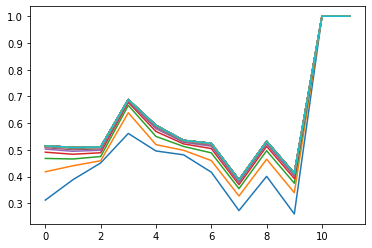

In [9]:
steps = 30 # 重复30次
atts = [] # 对信息的态度总和，越高表示越积极

for i in range(steps):
    # 遍历网络中的所有节点
    for node in g.nodes():
        node.step()

    # 收集每个人的态度，绘图
    col=[n.a for n in g.nodes()]
    plt.plot(col)

    # 计算网络中态度的总和
    atts.append(sum(col))

**讨论**
+ 横轴为10个普通用户和2个影响者的编号，纵轴为态度值
+ 每条曲线代表一个step，用户的态度
+ 随着step次数增加，每个普通用户的态度都不断提高

### 绘制网络平均态度曲线

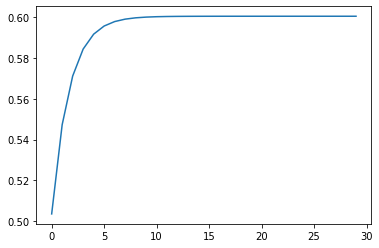

In [10]:
plt.plot(np.array(atts) / g.number_of_nodes())

**讨论**
+ 随着step执行5次，网络节点由于受到两个影响者的影响，网络的平均态度快速增加到0.8左右
+ 随着step继续执行，网络的平均态度增长停滞

**思考**
+ 如何改进模型使得更接近现实社会网络中信息传播？
+ 如何使得社会网络中信息扩散影响力最大化？